<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/decision_trees_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Decision Trees

- From [A Guide to Decision Trees for Machine Learning and Data Science](https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956)) by George Seif in [towardsdatascience.com](https://towardsdatascience.com)

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli).

Decision Trees are a class of very powerful Machine Learning model cable of achieving high accuracy in many tasks while being highly interpretable. What makes decision trees special in the realm of ML models is really their clarity of information representation. The “knowledge” learned by a decision tree through training is directly formulated into a hierarchical structure. This structure holds and displays the knowledge in such a way that it can easily be understood, even by non-experts.

## Decision Trees in Real-Life

You’ve probably used a decision tree before to make a decision in your own life. Take for example the decision about what activity you should do this weekend. It might depend on whether or not you feel like going out with your friends or spending the weekend alone; in both cases, your decision also depends on the weather. If it’s sunny and your friends are available, you may want to play soccer. If it ends up raining you’ll go to a movie. And if your friends don’t show up at all, well then you like playing video games no matter what the weather is like!

<figure><br>
  <center><img src="https://miro.medium.com/max/629/1*xLKdaL_RFhqFuy1iKSXvXA.png" /></center>
</figure>

This is a clear example of a real-life decision tree. We’ve built a tree to model a set of **sequential, hierarchical decisions** that ultimately lead to some final result. Notice that we’ve also chosen our decisions to be quite “high-level” in order to keep the tree small. For example, what if we set up many possible options for the weather such as 25 degrees sunny, 25 degrees raining, 26 degrees sunny, 26 degrees raining, 27 degrees sunny…. etc, our tree would be huge! The **exact** temperature really isn’t too relevant, we just want to know whether it’s OK to be outside or not.

The concept is the same for decision trees in Machine Learning. We want to build a tree with a set of hierarchical decisions which eventually give us a final result, i.e our classification or regression prediction. The decisions will be selected such that the tree is as small as possible while aiming for high classification / regression accuracy.

### Induction

From a high level, decision tree induction goes through 4 main steps to build the tree:

1. Begin with your training dataset, which should have some feature variables and classification or regression output.

2. Determine the “best feature” in the dataset to split the data on; more on how we define “best feature” later

3. Split the data into subsets that contain the possible values for this best feature. This splitting basically defines a node on the tree i.e each node is a splitting point based on a certain feature from our data.

4. Recursively generate new tree nodes by using the subset of data created from step 3. We keep splitting until we reach a point where we have optimised, by some measure, maximum accuracy while minimising the number of splits / nodes.

Step 1 is easy, just grab your dataset!

For step 2, the selection of which feature to use and the specific split is commonly chosen using a greedy algorithm to minimise a cost function. If we think about it for a second, performing a split when building a decision tree is equivalent to dividing up the feature space. We will iteratively try out different split points and then at the end select the one that has the lowest cost. Of course we can do a couple of smart things like only splitting within the range of values in our dataset. This will keep us from wasting computations on testing out split points that are trivially poor.

For a [**regression tree**](http://saedsayad.com/decision_tree_reg.htm), we can use a simple squared error as our cost function:

$$
E = \sum (Y - \hat{Y})^2
$$

Where $Y$ is our ground truth and $\hat{Y}$ is our predicted value; we sum over all the samples in our dataset to get the total error. For a classification, we use the [Gini Index Function](https://en.wikipedia.org/wiki/Gini_coefficient):

$$
E = \sum (p_k * (1 - p_k))
$$

Where $p_k$ are the proportion of training instances of class $k$ in a particular prediction node. A node should *ideally* have an error value of zero, which means that each split outputs a single class 100% of the time. This is exactly what we want because then we know, once we get to that particular decision node, what exactly our output will be whether we are on one side of the decision boundary or the other.

This concept of having a single class per-split across our dataset is known as *information gain*. Check out the example below.

<figure><br>
  <center><img src="https://miro.medium.com/max/600/1*z7tK94rGGIy_42UpiqilLQ.png" /></center>
</figure>


If we were to choose a split where each output has a mix of classes depending on the input data, then we really haven’t *gained* any information at all; we don’t know any better whether or not a particular node i.e feature has any influence in classifying our data! On the otherhand, if our split has a high percentage of each class for each output, then we have *gained* the information that splitting in that particular way on that particular feature variable gives us a particular output!

Now we could of course keep splitting and splitting and splitting until our tree has thousands of branches….. but that’s not really such a good idea! Our decision tree would be huge, slow, and overfitted to our training dataset. Thus, we will set some predefined stopping criterion to halt the construction of the tree.

The most common stopping method is to use a minimum count on the number of training examples assigned to each leaf node. If the count is less than some minimum value then the split is not accepted and the node is taken as a final leaf node. If all of our leafs nodes become final, the training stops. A smaller minimum count will give you finer splits and potentially more information, but is also prone to overfitting on your training data. Too large of a min count and you might stop to early. As such, the min value is usually set based on the dataset, depending on how many examples are expected to be in each class.

### Pruning

Because of the nature of training decision trees they can be prone to major overfitting. Setting the correct value for minimum number of instances per node can be challenging. Most of the time, we might just go with a safe bet and make that minimum quite small, resulting in there being many splits and a very large, complex tree. The key is that many of these splits will end up being redundant and unnecessary to increasing the accuracy of our model.

Tree pruning is a technique that leverages this splitting redundancy to remove i.e *prune* the unnecessary splits in our tree. From a high-level, pruning compresses part of the tree from strict and rigid decision boundaries into ones that are more smooth and generalise better, effectively reducing the tree complexity. The complexity of a decision tree is defined as the number of splits in the tree.

A simple yet highly effective pruning method is to go through each node in the tree and evaluate the effect of removing it on the cost function. If it doesn’t change much, then prune away!

# Python code

**Usage NOTE!** Use `Shift+Enter` to step through this notebook, executing the code as you go.

## An Example in Scikit Learn

Decision trees for both classification and regression are super easy to use in Scikit Learn with a built in class! We’ll first load in our dataset and initialise our decision tree for classification. Running training is then a simple one-liner!



In [0]:
from sklearn.datasets import load_iris
from sklearn import tree

# Load in our dataset
iris = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris.data, iris.target)

Scikit Learn also allows us to visualise our tree using the graphviz library. It comes with a few options that will help in visualising the decision nodes and splits that the model learned which is super useful for understanding how it all works! Below we will colour the nodes based on the feature names and display the class and feature information of each node.

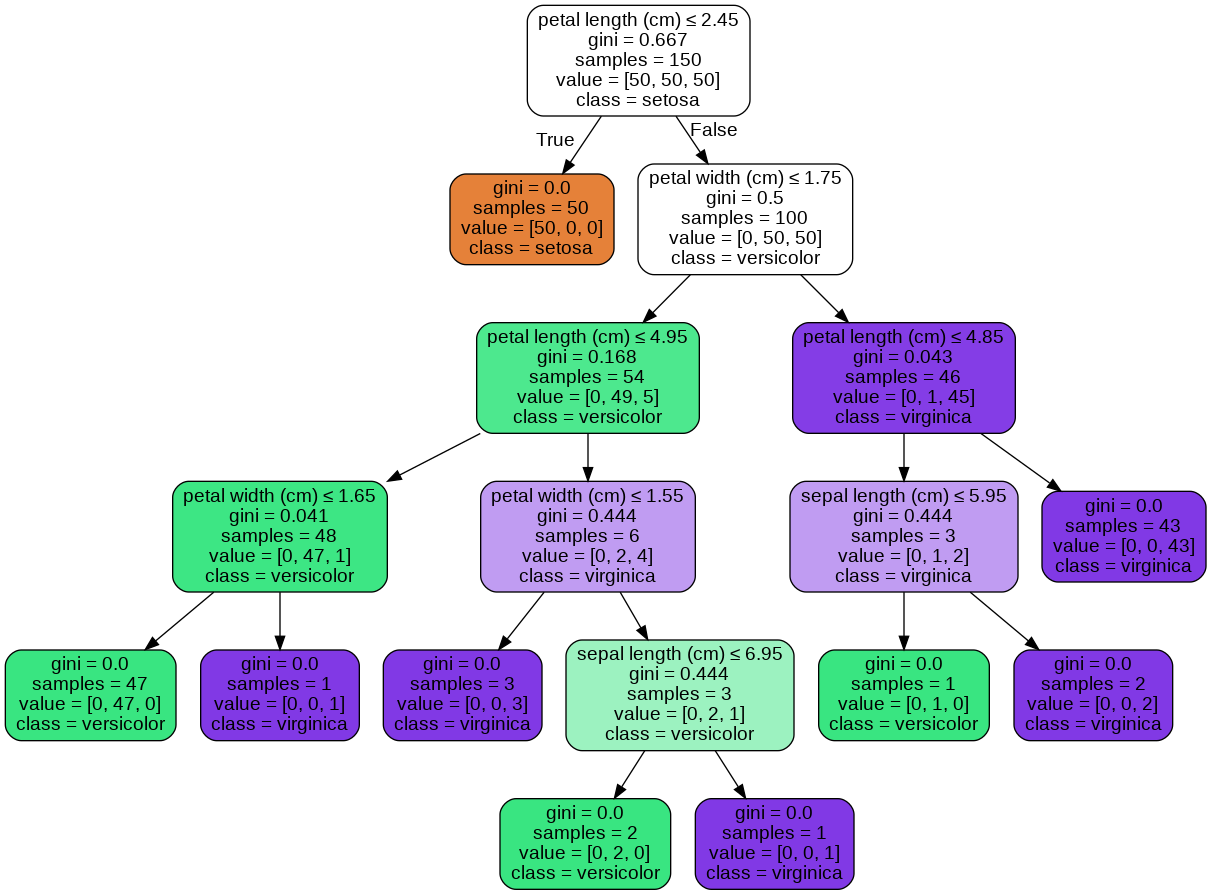

In [13]:
import graphviz 
from IPython.display import Image

dot_data = tree.export_graphviz(
    classification_tree, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True,
    rounded=True,  
    special_characters=True
)  
graph = graphviz.Source(dot_data)  
thefile = graph.render("iris", format='png') 
Image(filename=thefile) 

## Adjusting decision tree parameters

There are several parameters that you can set for your decision tree model in Scikit Learn too. Here are a few of the more interesting ones to play around with to try and get some better results:

- **max_depth**: The max depth of the tree where we will stop splitting the nodes. This is similar to controlling the maximum number of layers in a deep neural network. Lower will make your model faster but not as accurate; higher can give you accuracy but risks overfitting and may be slow.

- **min_samples_split**: The minimum number of samples required to split a node. We discussed this aspect of decision trees above and how setting it to a higher value would help mitigate overfitting.

- **max_features**: The number of features to consider when looking for the best split. Higher means potentially better results with the tradeoff of training taking longer.

- **min_impurity_split**: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold. This can be used to tradeoff combating overfitting (high value, small tree) vs high accuracy (low value, big tree).

- **presort**: Whether to presort the data to speed up the finding of best splits in fitting. If we sort our data on each feature beforehand, our training algorithm will have a much easier time finding good values to split on.

## Tips for Practically Applying Decision Trees

Here are a few of the pro and cons of decision trees that can help you decide on whether or not it’s the right model for your problem, as well as some tips as to how you can effectively apply them:

### Pros

- **Easy to understand and interpret**. At each node, we are able to see exactly what decision our model is making. In practice we’ll be able to fully understand where our accuracies and errors are coming from, what type of data the model would do well with, and how the output is influenced by the values of the features. Scikit learn’s visualisation tool is a fantastic option for visualising and understanding decision trees.

- **Require very little data preparation**. Many ML models may require heavy data pre-processing such as normalization and may require complex regularisation schemes. Decision trees on the other hand work quite well out of the box after tweaking a few of the parameters.

- **The cost of using the tree for inference is logarithmic in the number of data points used to train the tree**. That’s a huge plus since it means that having more data won’t necessarily make a huge dent in our inference speed.

### Cons

- **Overfitting is quite common** with decision trees simply due to the nature of their training. It’s often recommended to perform some type of dimensionality reduction such as PCA so that the tree doesn’t have to learn splits on so many features.

- **Vulnerable to bias**. For similar reasons as the case of overfitting, decision trees are also vulnerable to becoming biased to the classes that have a majority in the dataset. It’s always a good idea to do some kind of class balancing such as class weights, sampling, or a specialised loss function.

## End of note.